In [1]:
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import KFold
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

In [2]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [3]:
app_test = pd.read_csv(DATASET_DIR / "application_test.csv")
app_train = pd.read_csv(DATASET_DIR / "application_train.csv")

In [4]:
data = pd.read_csv(DATASET_DIR / "Datengruppierung" / "dataset.csv")
app_train = data

In [5]:
app_train["TARGET"].replace(
    {
        0: "Payback",
        1: "Default"
    }, inplace = True
)

In [6]:
n_heads = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
m_heads = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
md_heads = ['CNT_CHILDREN', "CNT_FAM_MEMBERS","HOUR_APPR_PROCESS_START", "OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]
ms_heads = [head for head in m_heads if head not in md_heads]

In [7]:
m = app_train[m_heads]
n = app_train[n_heads]
md = m[md_heads]
ms = m[ms_heads]

In [8]:
# Test Datenbereinigung
# Verbesserung der Prognosegenauigkeit von 0.7465 auf 0.7501
mode = [head for head in m_heads if "MODE" in head]
medi = [head for head in m_heads if "MEDI" in head]
app_train = app_train.drop(mode + medi, axis=1)

andere = ["REGION_RATING_CLIENT_W_CITY", "LIVE_REGION_NOT_WORK_REGION"]
for head in andere:
    n_heads.remove(head)
app_train = app_train.drop(andere, axis=1)

In [9]:
# transformiert kategorische variablen in integer
for head in n_heads:
    app_train[head], cats = pd.factorize(app_train[head])

In [10]:
y = app_train["TARGET"]
x = app_train.drop(["SK_ID_CURR", "TARGET"], axis=1)

In [11]:
# ersätzt alle np.nan durch 0
x = x.fillna(0)

In [12]:
# # unterteilt den trainingsdatensatz in trainings- und validierungsdatensätze
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)

In [14]:
model = RandomForestClassifier(max_depth=15, random_state=0)
#model = RandomForestClassifier(max_depth=20, random_state=0)

In [15]:
aucs = []

kfold = KFold(5, True, 1)
data = app_train

# enumerate splits
for i, (train, test) in enumerate(kfold.split(data)):
    model.fit(x.loc[train], y.loc[train])
    
    # Prognosewerte der Testdaten in %
    x_test_prob = model.predict_proba(x.loc[test])

    # Erstellung der AUC & ROC-Metrik
    # Wahrscheinlichkeiten für keinen Kreditausfall
    prob = x_test_prob[:,1]
    auc = roc_auc_score(y.loc[test], prob)
    aucs.append(auc)
    print('train: %s, test: %s, auc: %s' % (train, test, auc))

print("\n")
print("Durchschnitt: %.2f" % (np.mean(aucs)))
print("Standardabw.: %.2f" % (np.std(aucs)))
print("Varianz:      %.2f" % (np.var(aucs)))

KeyboardInterrupt: 

### Test Grid Search

In [13]:
model = RandomForestClassifier()

In [14]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [15]:
param_grid = [
  {
      "max_depth" : [5, 10, 15, 20, 25, 100, 200, None],
      "max_features" : [5, 10, 15, 20, 100, 250, 500, 600, "auto"],
      "max_samples" : [5, 10, 15, 20, 25, 100, 200],
      "min_samples_leaf" : [50, 100, 150, 200],
      "n_estimators": [50, 100, 150, 200],
  }
]

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)

In [18]:
scoring = {'AUC': 'roc_auc'}

In [ ]:
clf = GridSearchCV(
        RandomForestClassifier(), param_grid, scoring="roc_auc", n_jobs=-1
        #RandomForestClassifier(), param_grid, scoring=scoring, refit="AUC", return_train_score=True
    )
clf.fit(x_train, y_train)

In [ ]:
clf.best_params_

In [ ]:
results = clf.cv_results_

In [ ]:
results

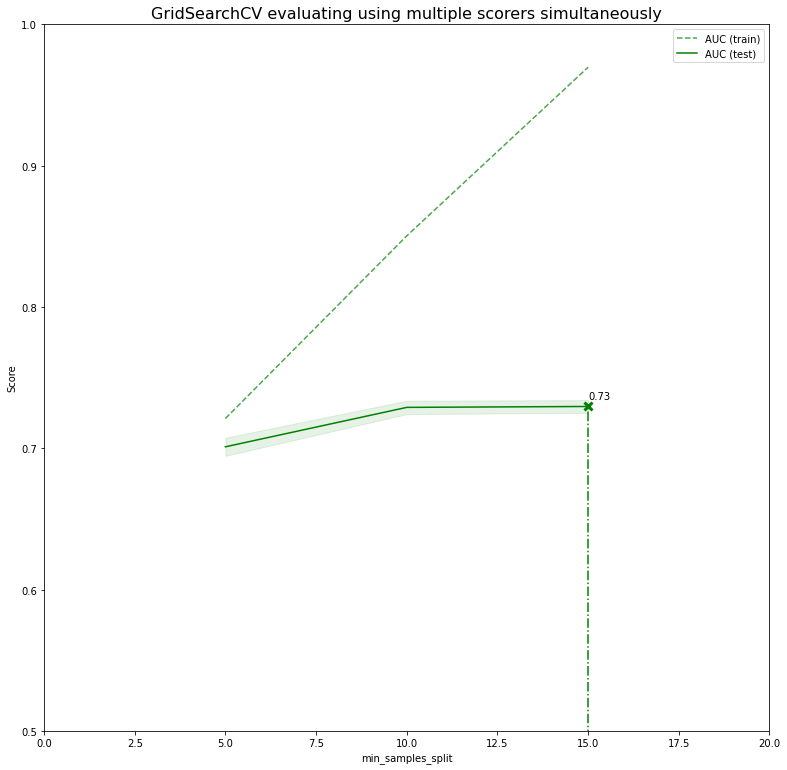

In [58]:
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("min_samples_split")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 20)
ax.set_ylim(0.5, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_max_depth'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g']):
    for sample, style in (('train', '--'),('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

### Sortierung der Parameter nach Feature Importance eines einfachen Random Forest Modells

Nach dieser Sortierung erfolgt die systematische Paramterfilterung mittels Ridge Regression

In [66]:
# Feature Importance

# Koeffizienten der einzelnen Klassen
coef_dict = {}
for coef, feat in zip(model.feature_importances_, x.columns.values):
    coef_dict[feat] = coef

d = dict(sorted(coef_dict.items(), key=lambda item: item[1], reverse=True))

# for i,v in d.items():
#     print('Feature: {}, Score: {}'.format(i,v))

In [67]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# model = Ridge()
# # define model evaluation method

# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# # define grid
# grid = dict()
# grid['alpha'] = np.arange(0, 1, 0.01)
# # define search
# search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# # perform the search
# results = search.fit(x, y)
# # summarize
# print('MAE: %.3f' % results.best_score_)
# print('Config: %s' % results.best_params_)

In [68]:
def ridge_auc(x):
    x = x.fillna(0)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)
    #normalisiert, da manche variablen sehr stark auseindergehende werte haben und damit eine warnung verursachen
    model = Ridge(alpha=0,normalize=True)
    model.fit(x,y)
    auc = roc_auc_score(y_test, model.predict(x_test))
    return auc

In [70]:
model = Ridge(alpha=0)
data = app_train

aucs = []
kfold = KFold(5, True, 1)

# enumerate splits
for i, (train, test) in enumerate(kfold.split(data)):
    model.fit(x.loc[train], y.loc[train])
    auc = roc_auc_score(y.loc[test], model.predict(x.loc[test]))
    aucs.append(auc)
    print('train: %s, test: %s, auc: %s' % (train, test, auc))

print("\n")
print("Durchschnitt: %.2f" % (np.mean(aucs)))
print("Standardabw.: %.2f" % (np.std(aucs)))
print("Varianz:      %.2f" % (np.var(aucs)))

c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


train: [     0      2      3 ... 307508 307509 307510], test: [     1      4      6 ... 307493 307495 307501], auc: 0.7652198582327638
train: [     0      1      2 ... 307508 307509 307510], test: [     3     18     22 ... 307499 307503 307504], auc: 0.7500047692501117
train: [     0      1      2 ... 307508 307509 307510], test: [     9     10     15 ... 307489 307492 307502], auc: 0.7507863642291437
train: [     0      1      2 ... 307506 307507 307508], test: [    12     16     23 ... 307505 307509 307510], auc: 0.7527535584706329
train: [     1      3      4 ... 307505 307509 307510], test: [     0      2      5 ... 307506 307507 307508], auc: 0.7536624964165308


Durchschnitt: 0.75
Standardabw.: 0.01
Varianz:      0.00


In [ ]:
# ACHTUNG! Sehr zeitintensiver Code. Nächste Zeile fasst das Ergebnis zusammen.

# features = list(reversed(t.index))
# drop = []
# v = features[:3]
# x_ = x[v]
# auc = ridge_auc(x_)
# features = features[3:]
# for feature in features:
#     v.append(feature)
#     x_ = x[v]
#     auc_ = ridge_auc(x_)
#     diff = auc_ - auc
#     print(diff, feature)
#     auc = auc_
#     if diff < 0:
#         drop.append(feature)

# features = list(reversed(t.index))
# test = [feature for feature in features if feature not in drop]
# drop

In [71]:
drop = ["('DAYS_CREDIT', 1.0)", "('AMT_CREDIT_MAX_OVERDUE', 0.75)", "('AMT_TOTAL_RECEIVABLE', 0.25)", "('AMT_CREDIT_SUM_DEBT', 0.75)", "('AMT_CREDIT_MAX_OVERDUE', 0.5)", "('AMT_BALANCE', 0.5)", "('AMT_RECEIVABLE_PRINCIPAL', 0.0)", "('AMT_PAYMENT', 1.0)", "('AMT_TOTAL_RECEIVABLE', 0.5)", "('AMT_CREDIT_SUM_DEBT', 1.0)", "('DAYS_CREDIT_UPDATE', 0.0)", "('AMT_BALANCE', 0.75)", "('DAYS_LAST_DUE_1ST_VERSION', 0.0)", "('DAYS_LAST_DUE_1ST_VERSION', 0.5)", "('CNT_DRAWINGS_ATM_CURRENT', 1.0)", 'REGION_POPULATION_RELATIVE', 'ELEVATORS_AVG', 'WALLSMATERIAL_MODE', "('AMT_INSTALMENT', 0.75)", "('CNT_PAYMENT', 0.5)", "('AMT_CREDIT_SUM_DEBT', 0.25)", "('AMT_RECIVABLE', 0.5)", "('AMT_BALANCE', 1.0)", "('AMT_PAYMENT_CURRENT', 0.25)", "('CNT_DRAWINGS_POS_CURRENT', 0.75)", "('DAYS_FIRST_DUE', 0.5)", "('AMT_ANNUITY', 0.5)_pa", "('CNT_INSTALMENT_MATURE_CUM', 0.5)", "('AMT_TOTAL_RECEIVABLE', 1.0)", "('AMT_CREDIT_MAX_OVERDUE', 0.0)", "('DAYS_DECISION', 0.75)", "('HOUR_APPR_PROCESS_START', 0.0)", "('AMT_PAYMENT_TOTAL_CURRENT', 0.25)", "('HOUR_APPR_PROCESS_START', 0.75)", '43', "('AMT_GOODS_PRICE', 1.0)", "('AMT_CREDIT_SUM', 0.0)", "('AMT_APPLICATION', 0.25)", '1', "('AMT_DRAWINGS_CURRENT', 1.0)", "('AMT_INST_MIN_REGULARITY', 0.75)", "('DAYS_LAST_DUE', 0.5)", "('AMT_CREDIT', 0.75)", "('AMT_DRAWINGS_ATM_CURRENT', 0.5)", "('AMT_GOODS_PRICE', 0.5)", "('AMT_DRAWINGS_CURRENT', 0.5)", "('AMT_ANNUITY', 0.75)_pa", 'YEARS_BUILD_AVG', "('HOUR_APPR_PROCESS_START', 0.25)", "('HOUR_APPR_PROCESS_START', 1.0)", 'BASEMENTAREA_AVG', '4', "('AMT_CREDIT_SUM_OVERDUE', 0.5)", "('CNT_DRAWINGS_CURRENT', 0.5)", "('RATE_DOWN_PAYMENT', 0.5)", "('DAYS_DECISION', 1.0)", '58', "('MONTHS_BALANCE', 0.5)_cc", "('AMT_DRAWINGS_POS_CURRENT', 0.75)", "('CNT_INSTALMENT_MATURE_CUM', 0.25)", '10', "('CREDIT_DAY_OVERDUE', 0.75)", 'AMT_INCOME_TOTAL', '38', 'OBS_30_CNT_SOCIAL_CIRCLE', '29', 'FLOORSMIN_AVG', "('AMT_DRAWINGS_POS_CURRENT', 0.5)", "('CNT_INSTALMENT_MATURE_CUM', 1.0)", '31', "('AMT_APPLICATION', 1.0)", '57', "('CNT_INSTALMENT_FUTURE', 0.0)", "('AMT_ANNUITY', 1.0)", '7', '20', "('SK_DPD_DEF', 1.0)_cc", '34', 'Card X-Sell', "('AMT_DOWN_PAYMENT', 0.0)", 'NAME_TYPE_SUITE', 'Cash Street: low', '2', '9', "('AMT_CREDIT_LIMIT_ACTUAL', 0.0)", "('AMT_ANNUITY', 0.75)", 'NONLIVINGAREA_AVG', '66', '40', '49', '28', '13', '48', "('CNT_DRAWINGS_POS_CURRENT', 0.25)", "('AMT_CREDIT_SUM_LIMIT', 0.25)", '24', '32', '45', "('CNT_DRAWINGS_POS_CURRENT', 0.5)", '36', "('AMT_ANNUITY', 0.5)", "('AMT_DRAWINGS_POS_CURRENT', 0.0)", "('AMT_INST_MIN_REGULARITY', 0.0)", "('SK_DPD_DEF', 0.75)_cc", "('NFLAG_INSURED_ON_APPROVAL', 0.25)", 'LIVE_CITY_NOT_WORK_CITY', "('SK_DPD', 0.5)", "('CNT_CREDIT_PROLONG', 1.0)", '35', '47', "('DAYS_FIRST_DRAWING', 1.0)", '178', 'POS mobile without interest', '82', '181', 'AMT_REQ_CREDIT_BUREAU_WEEK', "('CNT_CREDIT_PROLONG', 0.5)", '96', '12', "('SK_DPD', 0.0)", '114', '136', "('RATE_INTEREST_PRIVILEGED', 0.75)", "('RATE_INTEREST_PRIVILEGED', 0.5)", '128', 'Loan for business development', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_DAY', '93', '22', '131', '72', 'POS industry without interest', '86', '116', "('AMT_CREDIT_SUM_OVERDUE', 0.0)", '75', 'FLAG_OWN_REALTY', '79', "('RATE_INTEREST_PRIVILEGED', 0.25)", '156', '78', '137', 'Signed_cc', '122', '99', '80', '138', '89', '95', '127', '87', 'FLAG_DOCUMENT_11', "('CNT_DRAWINGS_OTHER_CURRENT', 0.75)", '74', 'AMT_REQ_CREDIT_BUREAU_MON', "('AMT_DRAWINGS_OTHER_CURRENT', 0.5)", 'Another type of loan', '151', 'Car loan', '90', "('NFLAG_INSURED_ON_APPROVAL', 1.0)", '208', 'Unknown type of loan', '91', "('RATE_INTEREST_PRIVILEGED', 0.0)", '196', '223', '225', '228', '230', '231', '234', '235', '237', '238', '240', '221', '218', '198', '200', '201', '203', '205', '207', '209', '212', '214', '244', 'Demand_cc', '268', '270', '272', '274', '276', "('AMT_DRAWINGS_OTHER_CURRENT', 0.25)", "('CNT_DRAWINGS_OTHER_CURRENT', 0.25)", "('SK_DPD_DEF', 0.0)_cc", "('SK_DPD_DEF', 0.5)_cc", '267', '265', '246', '247', '248', '250', '252', '253', '256', '258', '260', '262', '197', "('SK_DPD_DEF', 0.0)", 'XNA', '73', '84', '113', "('NFLAG_LAST_APPL_IN_DAY', 0.75)", 'FLAG_DOCUMENT_10', 'REG_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_7', 'Real estate loan', "('CNT_CREDIT_PROLONG', 0.0)", 'Interbank credit', 'Loan for purchase of shares (margin lending)', '126', '194', '169', '170', '177', '183', '184', '191', '192', '165', '163', '135', '140', '141', '144', '161', '152', '153', '154', '158']

# Random Forest 2

In [72]:
head = [head for head in x.columns if head not in drop]

In [73]:
x = x[head]

In [74]:
model = RandomForestClassifier(max_depth=7, random_state=0)
#model = RandomForestClassifier(max_depth=20, random_state=0)

In [75]:
model.fit(x,y)

RandomForestClassifier(max_depth=7, random_state=0)

In [76]:
aucs = []

kfold = KFold(5, True, 1)
data = x

# enumerate splits
for i, (train, test) in enumerate(kfold.split(data)):
    model.fit(x.loc[train], y.loc[train])
    
    # Prognosewerte der Testdaten in %
    x_test_prob = model.predict_proba(x.loc[test])

    # Erstellung der AUC & ROC-Metrik
    # Wahrscheinlichkeiten für keinen Kreditausfall
    prob = x_test_prob[:,1]
    auc = roc_auc_score(y.loc[test], prob)
    aucs.append(auc)
    print('train: %s, test: %s, auc: %s' % (train, test, auc))

print("\n")
print("Durchschnitt: %.2f" % (np.mean(aucs)))
print("Standardabw.: %.2f" % (np.std(aucs)))
print("Varianz:      %.2f" % (np.var(aucs)))

c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


train: [     0      2      3 ... 307508 307509 307510], test: [     1      4      6 ... 307493 307495 307501], auc: 0.7268808649039264
train: [     0      1      2 ... 307508 307509 307510], test: [     3     18     22 ... 307499 307503 307504], auc: 0.7234024316391607
train: [     0      1      2 ... 307508 307509 307510], test: [     9     10     15 ... 307489 307492 307502], auc: 0.7180667335382116
train: [     0      1      2 ... 307506 307507 307508], test: [    12     16     23 ... 307505 307509 307510], auc: 0.7197507925372268
train: [     1      3      4 ... 307505 307509 307510], test: [     0      2      5 ... 307506 307507 307508], auc: 0.7196781373882329


Durchschnitt: 0.72
Standardabw.: 0.00
Varianz:      0.00


In [77]:
len(drop)

245

In [78]:
len(x.columns)

469

### Ergebnis: kleine Verbesserung der AUC, Möglichkeit zum Löschen von 245 Variablen ohne Prognoseverlust

train: [     0      1      2 ... 307508 307509 307510], test: [     6     19     20 ... 307488 307493 307495]
train: [     0      2      3 ... 307508 307509 307510], test: [     1      4      8 ... 307471 307480 307501]
train: [     0      1      2 ... 307508 307509 307510], test: [     3     18     30 ... 307474 307499 307503]
train: [     0      1      2 ... 307508 307509 307510], test: [    22     29     38 ... 307473 307487 307504]
train: [     0      1      2 ... 307508 307509 307510], test: [    21     42     56 ... 307475 307489 307502]
train: [     0      1      2 ... 307508 307509 307510], test: [     9     10     15 ... 307483 307486 307492]
train: [     0      1      2 ... 307507 307508 307509], test: [    12     16     25 ... 307484 307500 307510]
train: [     0      1      2 ... 307507 307508 307510], test: [    23     37     55 ... 307497 307505 307509]
train: [     0      1      3 ... 307506 307509 307510], test: [     2     11     35 ... 307494 307507 307508]
train: [  

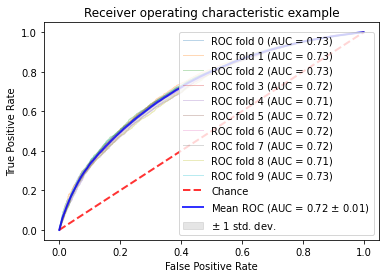

In [112]:
# Optische Repräsentation der Cross-Validation

# tprs = []
# aucs = []
# mean_fpr = np.linspace(0, 1, 100)
# fig, ax = plt.subplots()

# # enumerate splits
# for i, (train, test) in enumerate(kfold.split(data)):
#     print('train: %s, test: %s' % (train, test))
#     model.fit(x.loc[train], y.loc[train])
    
# #     # Prognosewerte der Testdaten in %
# #     x_test_prob = model.predict_proba(x.loc[test])

# #     # Erstellung der AUC & ROC-Metrik
# #     # Wahrscheinlichkeiten für keinen Kreditausfall
# #     prob = x_test_prob[:,1]
# #     auc = roc_auc_score(y.loc[test], prob)
# #     print(auc)
    
# #     # FalsePositiveRate, TruePositiveRate & Treshold
# #     fpr, tpr, threshold = roc_curve(y.loc[test], prob)
    
#     viz = plot_roc_curve(model, x.loc[test], y.loc[test],
#                      name='ROC fold {}'.format(i),
#                      alpha=0.3, lw=1, ax=ax)
    
#     interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
#     interp_tpr[0] = 0.0
    
#     tprs.append(interp_tpr)
#     aucs.append(viz.roc_auc)

# ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
#         label='Chance', alpha=.8)

# mean_tpr = np.mean(tprs, axis=0)
# mean_tpr[-1] = 1.0
# mean_auc = auc(mean_fpr, mean_tpr)
# std_auc = np.std(aucs)
# ax.plot(mean_fpr, mean_tpr, color='b',
#         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
#         lw=2, alpha=.8)

# std_tpr = np.std(tprs, axis=0)
# tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
# tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                 label=r'$\pm$ 1 std. dev.')

# ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
#        title="Receiver operating characteristic example")
# ax.legend(loc="lower right")
# plt.show()